# Problema 1

Una macchina confeziona sacchetti di caramelle del peso medio di 200g e scarto quadratico medio di 10g.<br> 
Supponendo che la distribuzione sia normale, calcolare:
1. La percentuale di sacchetti che pesano più di 220g;
2. La percentuale di sacchetti che pesano più di 190g;
3. Supponendo di scartare i sacchetti con peso inferiore a 185g, su 1000 sacchetti quanti ne verranno scartati?

In [3]:
from scipy.stats import norm

bound = 220
p = 1-norm.cdf(bound, 200, 10)
print(f'Percentuale di sacchetti che pesano più di {bound}g: {p*100:.2f}%')

Percentuale di sacchetti che pesano più di 220g: 2.28%


In [4]:
bound = 190
p = 1-norm.cdf(bound, 200, 10)
print(f'Percentuale di sacchetti che pesano più di {bound}g: {p*100:.2f}%')

Percentuale di sacchetti che pesano più di 190g: 84.13%


In [5]:
bound = 185
n = 1000
p = norm.cdf(bound, 200, 10)
amount = n * p
print(f'Numero di sacchetti scartati: {amount:.2f}')

Numero di sacchetti scartati: 66.81


# Problema 2

La seguente tabella raccoglie i dati relativi alle temperature medie invernali registrate negli ultimi 10 anni in una città italiana
Si determinino:
1. I coefficienti della retta di regressione;
2. Il coefficiente di Pearson;
3. Il valore della temperatura previsto per l’anno 2022
   
L’analisi di regressione conduce ad asserire che i dati seguano l’andamento rettilineo e che vi è la tendenza della temperatura a
crescere begli anni? (Si giustifichi la risposta)

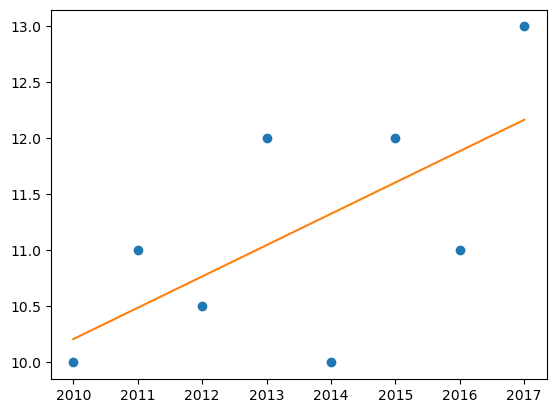

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[2010, 10],
                 [2011, 11],
                 [2012, 10.5],
                 [2013, 12],
                 [2014, 10],
                 [2015, 12],
                 [2016, 11],
                 [2017, 13]])

x = data[:, 0]
y = data[:, 1]
k = 2 # numero di parametri indipendenti + 1 (termine costante)
n = x.size

x1 = np.ones(n)
x2 = x
X = np.zeros((n, k))
X[:,0] = x1
X[:,1] = x2

XX = np.linalg.pinv(X)
b = XX@y
Y = b[0] + b[1]*x

plt.plot(x, y, 'o')
plt.plot(x, Y)
plt.show()

In [21]:
# Si consideri il coefficiente di Pearson come la radice quadrata del coefficiente di determinazione

y_hat = X@b
y_bar = np.mean(y)

R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
R = np.sqrt(R2)
print(f'Coefficiente di Pearson: {R:.3f}')

Coefficiente di Pearson: 0.642


In [26]:
x_star = 2022
Y = b[0] + b[1]*x_star
print(f"Valore di temperatura previsto per l'anno {x_star} : {Y:.2f}°")

Valore di temperatura previsto per l'anno 2022 : 13.57°
